In [1]:
import os
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 19 - 20')

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('airline_passengers.csv')

In [4]:
dataset

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [6]:
dataset.set_index('Month', inplace=True)

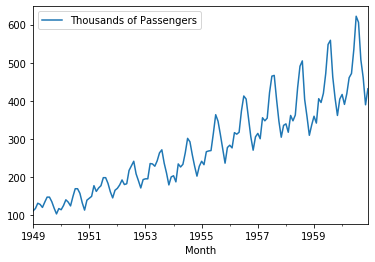

In [8]:
dataset.plot()

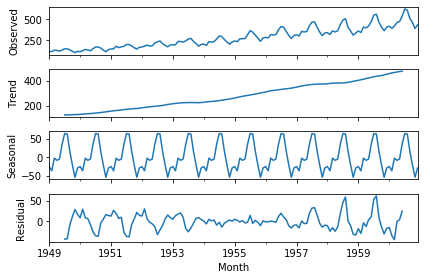

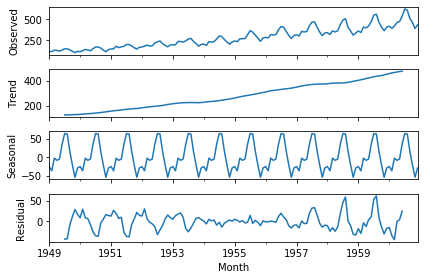

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'])
decomposition.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [11]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF Test Statistic', 'P-value','#Lags','No of Obs']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1] <= 0.05:
        print('TS is Stationary')
    else:
        print('TS is NS')

In [12]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic:0.8153688792060423
P-value:0.9918802434376409
#Lags:13
No of Obs:130
TS is NS


In [13]:
dataset['Thousands of Passengers 1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [15]:
adf_check(dataset['Thousands of Passengers 1st Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-2.8292668241699874
P-value:0.05421329028382711
#Lags:12
No of Obs:130
TS is NS


In [16]:
dataset['Thousands of Passengers 2nd Diff'] = dataset['Thousands of Passengers 1st Diff']-dataset['Thousands of Passengers 1st Diff'].shift(1)

In [19]:
adf_check(dataset['Thousands of Passengers 2nd Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-16.384231542468513
P-value:2.7328918500142026e-29
#Lags:11
No of Obs:130
TS is Stationary


In [ ]:
#d=2

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#yt+1 = b1yt + b2yt-1 + .... + c

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


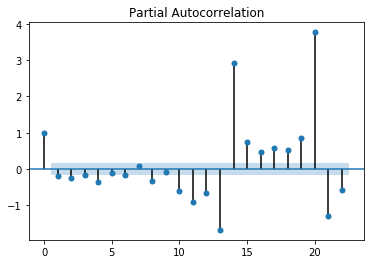

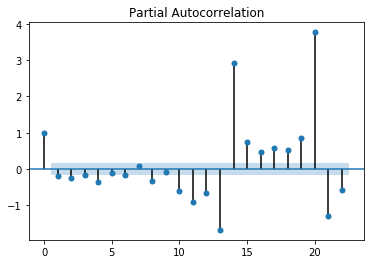

In [21]:
plot_pacf(dataset['Thousands of Passengers 2nd Diff'].dropna())
#p=0

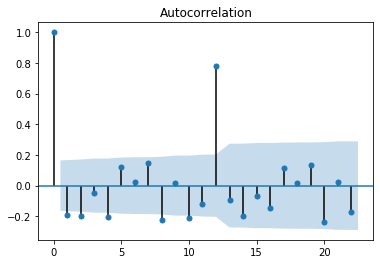

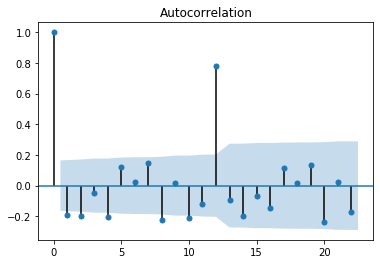

In [22]:
plot_acf(dataset['Thousands of Passengers 2nd Diff'].dropna())
#q=0

In [ ]:
#Yt+1 = aet + aet-1 + ..... + e + mU

In [ ]:
AR                    I                          MA
p=0                  d=2                        q=0
P=1                  D=1                        Q=3

In [23]:
dataset['Seasonal Difference'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [25]:
dataset.to_csv('season.csv')

In [26]:
adf_check(dataset['Seasonal Difference'].dropna())
#D=1

Augmented Dickey Fuller Test
ADF Test Statistic:-3.3830207264924805
P-value:0.011551493085514982
#Lags:1
No of Obs:130
TS is Stationary


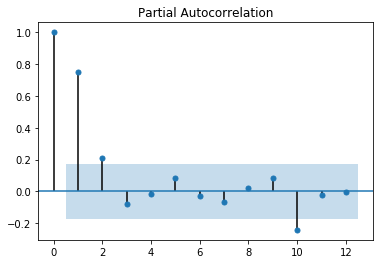

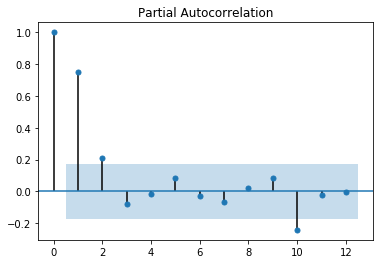

In [28]:
plot_pacf(dataset['Seasonal Difference'].dropna(), lags=12)
#P=1

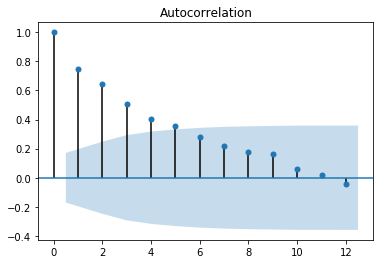

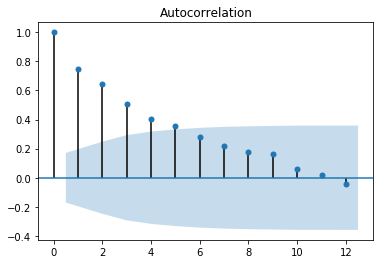

In [29]:
plot_acf(dataset['Seasonal Difference'].dropna(),lags=12)
#Q=2

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [42]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order=(0,1,0),seasonal_order=(1,2,2,12))
result = model.fit()
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 2, 2, 12)   Log Likelihood                -475.881
Date:                            Sun, 01 Mar 2020   AIC                            959.763
Time:                                    07:57:47   BIC                            970.879
Sample:                                01-01-1949   HQIC                           964.277
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4736      0.463      1.024      0.306      -0.433       1.380
ma.S.L12      -1.8827     77.461   

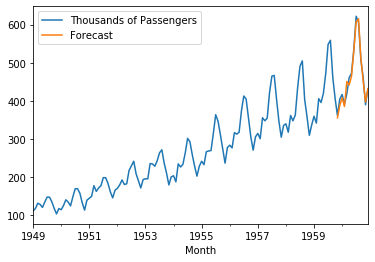

In [43]:
dataset['Forecast'] = result.predict(start=130, end=144,dynamic=True)
dataset[['Thousands of Passengers', 'Forecast']].plot()

In [33]:
len(dataset)

144

In [44]:
dataset

,Thousands of Passengers,Thousands of Passengers 1st Diff,Thousands of Passengers 2nd Diff,Seasonal Difference,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,615.265261
1960-09-01,508,-98.0,-82.0,45.0,513.174527
1960-10-01,461,-47.0,51.0,54.0,451.995122


In [ ]:
#autoarima

In [46]:
from pandas.tseries.offsets import DateOffset
future_dates = [dataset.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [48]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=dataset.columns)

In [50]:
future_df = pd.concat([dataset, future_dates_df])

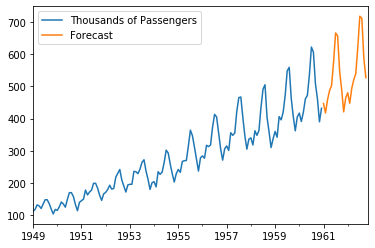

In [55]:
future_df['Forecast'] = result.predict(start=144, end=165, dynamic=True)
future_df[['Thousands of Passengers', 'Forecast']].plot()

In [56]:
future_df.to_csv('future.csv')

In [57]:
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 17')

In [58]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [59]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [60]:
x = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values

In [61]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [62]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,1] = labelencoder_x.fit_transform(x[:,1])

In [64]:
x[:,2] = labelencoder_x.fit_transform(x[:,2])

In [65]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [66]:
onehotencoder = OneHotEncoder(categorical_features=[1])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [67]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [69]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='rbf')
classifier_svc.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
y_pred = classifier_svc.predict(x_test)

In [71]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2376,    0],
       [ 624,    0]], dtype=int64)

In [ ]:
!pip install xgboost

In [73]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
y_pred = classifier.predict(x_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[2298,   78],
       [ 348,  276]], dtype=int64)